# **Maquina de lavar (*Fuzzy*)**

> Objetivo do Sistema: *O professor quis passar um problema aí pra ver se a gente conseguiria resolver usando fuzzy. O problema é basicamente o tempo que deverá lavar roupas em uma maquina de lavar levando em consideração a quantidade de sujeira e tamanho de mancha(s)*

* **Entrada**

> *Quanta suejira tem peça*:
   >> Universo (intervalo de valores nítidos/crisp): 0 a 100 

   >> Conjuntos *fuzzy* (valores difusos): **pouca**, **média** e **muita**.

> *Tamanho de mancha(s)*:
   >> Universo (intervalo de valores nítidos/crisp): 0 a 100 

   >> Conjuntos *fuzzy* (valores difusos): **sem**, **média** e **grande**.

*   **Saída**

> *Tempo de lavagem*
   >> Universo (intervalo de valores nítidos/crisp): 0 a 60 

   >> Conjuntos *fuzzy* (valores difusos): **muito curto**, **curto**,**médio** , **longo** e **muito longo**.


## Base de conhecimento (regras de decisão)

> **SE** sujeira é **POUCA** *E* mancha é **SEM**, **ENTÃO** tempo é **MUITO CURTO**

> **SE** sujeira é **POUCA** *E* mancha é **MÉDIA**, **ENTÃO** tempo é **MÉDIO**

> **SE** sujeira é **POUCA** *E* mancha é **GRANDE**, **ENTÃO** tempo é **LONGO**

> **SE** sujeira é **MÉDIA** *E* mancha é **SEM**, **ENTÃO** tempo é **CURTO**

> **SE** sujeira é **MÉDIA** *E* mancha é **MÉDIA**, **ENTÃO** tempo é **MÉDIO**

> **SE** sujeira é **MÉDIA** *E* mancha é **GRANDE**, **ENTÃO** tempo é **LONGO**

> **SE** sujeira é **MUITA** *E* mancha é **SEM**, **ENTÃO** tempo é **MÉDIO**

> **SE** sujeira é **MUITA** *E* mancha é **MÉDIA**, **ENTÃO** tempo é **LONGO**

> **SE** sujeira é **MUITA** *E* mancha é **GRANDE**, **ENTÃO** tempo é **MUITO LONGO**

---
## Referências
{1} SCIKIT-FUZZY. Scikit-Fuzzy Overview. Disponível em: https://pythonhosted.org/scikit-fuzzy/overview.html.

{2} PISTORI, H. Exemplo de aplicação de lógica nebulosa (fuzzy). Disponível em: https://colab.research.google.com/drive/13nqdB-kHLIMUxemuQJfnV1bqrLzM3hPS.



### **Instalação do Pacote** *skfuzzy*

In [ ]:
# Instale o pacote skfuzzy
!pip install scikit-fuzzy

### Criação das **Variáveis** e de seus respectivos **Termos Lingúisticos**

In [16]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Variáveis Linguísticas
sujeira = ctrl.Antecedent(np.arange(0,101,1), 'SUJEIRA')
manchas = ctrl.Antecedent(np.arange(0,101,1), 'MANCHAS')
tempo = ctrl.Consequent(np.arange(0,61,1), 'TEMPO DE LAVAGEM')

# Conjuntos de Termos Linguísticos (membership function tipo trapezoidal)
sujeira['POUCA'] = fuzz.trimf(sujeira.universe, [0,0,50])
sujeira['MÉDIA']      = fuzz.trimf(sujeira.universe, [0,50,100])
sujeira['MUITA']   = fuzz.trimf(sujeira.universe, [50,100,100])

manchas['SEM'] = fuzz.trimf(manchas.universe, [0,0,50])
manchas['MÉDIA']  = fuzz.trimf(manchas.universe, [0,50,100])
manchas['GRANDE']  = fuzz.trimf(manchas.universe, [50,100,100])

tempo['MUITO CURTO'] = fuzz.trimf(tempo.universe, [0,0,10])
tempo['CURTO']  = fuzz.trimf(tempo.universe, [0,10,25])
tempo['MÉDIO']    = fuzz.trimf(tempo.universe, [10,25,40])
tempo['LONGO']  = fuzz.trimf(tempo.universe, [25,40,60])
tempo['MUITO LONGO']    = fuzz.trimf(tempo.universe, [40,60,60])

### Mostrando graficamente as partições dos Universos **DINHEIRO**, **PESSOAL**  e **RISCO**

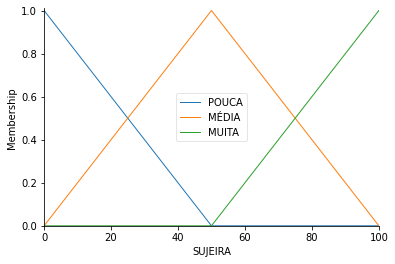

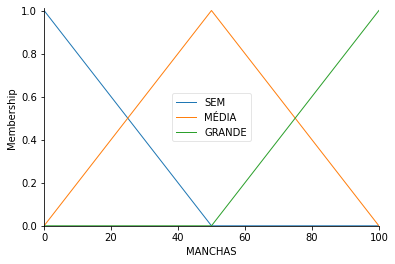

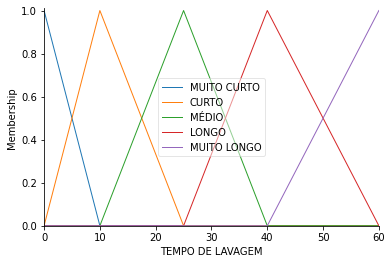

In [17]:
sujeira.view()
manchas.view()
tempo.view()

### Criando a **Base de Regras**

In [20]:
rule1 = ctrl.Rule(sujeira['POUCA'] & manchas['SEM'], tempo['MUITO CURTO'])
rule2 = ctrl.Rule(sujeira['POUCA'] & manchas['MÉDIA'], tempo['MÉDIO'])
rule3 = ctrl.Rule(sujeira['POUCA'] & manchas['GRANDE'], tempo['LONGO'])

rule4 = ctrl.Rule(sujeira['MÉDIA'] & manchas['SEM'], tempo['CURTO'])
rule5 = ctrl.Rule(sujeira['MÉDIA'] & manchas['MÉDIA'], tempo['MÉDIO'])
rule6 = ctrl.Rule(sujeira['MÉDIA'] & manchas['GRANDE'], tempo['LONGO'])

rule7 = ctrl.Rule(sujeira['MUITA'] & manchas['SEM'], tempo['MÉDIO'])
rule8 = ctrl.Rule(sujeira['MUITA'] & manchas['MÉDIA'], tempo['LONGO'])
rule9 = ctrl.Rule(sujeira['MUITA'] & manchas['GRANDE'], tempo['MUITO LONGO'])

### Criando o **Controlador Nebuloso**, definindo os **Entradas** e calculando o **Resultado**

In [32]:
tempo_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
tempo_simulador = ctrl.ControlSystemSimulation(tempo_ctrl)

# Entrando com alguns valores para qualidade da dinheiro e do pessoal
tempo_simulador.input['SUJEIRA'] = 65
tempo_simulador.input['MANCHAS'] = 70

#Computando o resultado
tempo_simulador.compute()

### Apresentando **Graficamente** o **Resultado**

Tempo de lavagem será de 34.17377567140601 %


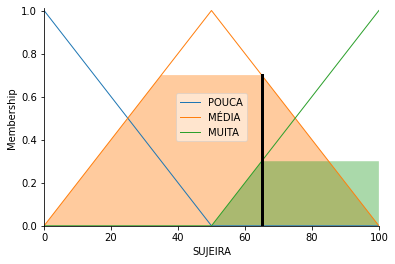

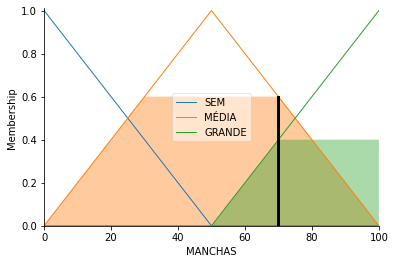

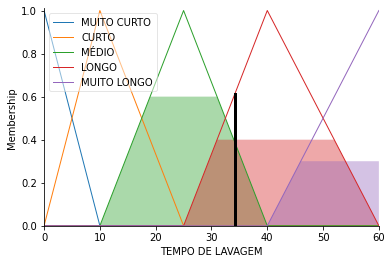

In [33]:
sujeira.view(sim=tempo_simulador)
manchas.view(sim=tempo_simulador)
tempo.view(sim=tempo_simulador)
print("Tempo de lavagem será de", tempo_simulador.output['TEMPO DE LAVAGEM'], "%")